In [91]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
dataset = pd.read_csv('seeds.csv')
dataset.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [94]:
dataset.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [95]:
dataset.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [96]:
dataset.columns=['Area', 'Perimeter', 'Compactness', 'Kernel_Length','Kernel_Width', 'Asymmetry_Coeff','Kernel_Groove' , 'Category']
dataset.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [97]:
dataset["Category"].replace({1 :"Kama" , 2 :"Rosa" , 3 :"Canadian"} , inplace = True)
dataset.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [98]:
dataset["Category"].replace({1 :"Kama" , 2 :"Rosa" , 3 :"Canadian"} , inplace = True)
dataset.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [99]:
dataset['Category'].unique()

array(['Kama', 'Rosa', 'Canadian'], dtype=object)

In [100]:
dataset.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel_Length      0
Kernel_Width       0
Asymmetry_Coeff    0
Kernel_Groove      0
Category           0
dtype: int64

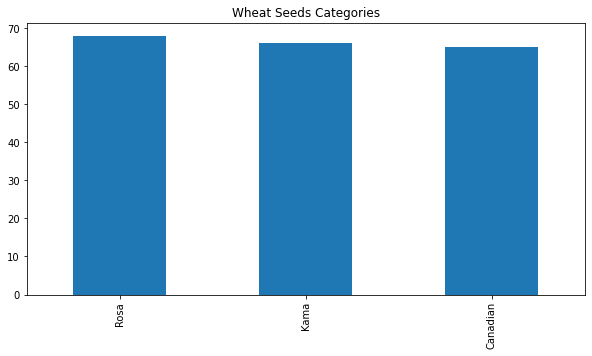

In [101]:
dataset['Category'].value_counts().plot(kind='bar', title='Wheat Seeds Categories', figsize=(10,5))
plt.show()

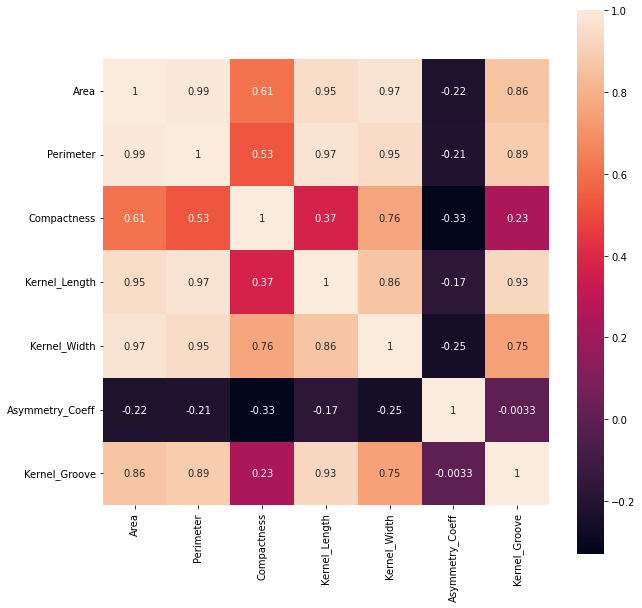

In [102]:
# corr = dataset.corr()
# fig, ax = plt.subplots(figsize=(10,10)) 
# sns.heatmap(corr, annot=True, square=True ,ax=ax)
# plt.yticks(rotation=360)
# plt.show()

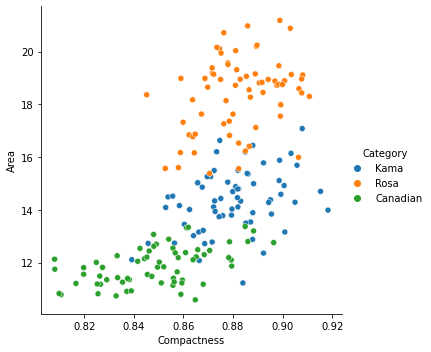

In [103]:
# sns.relplot(x='Compactness', y='Area', hue='Category', data=dataset)

<AxesSubplot:>

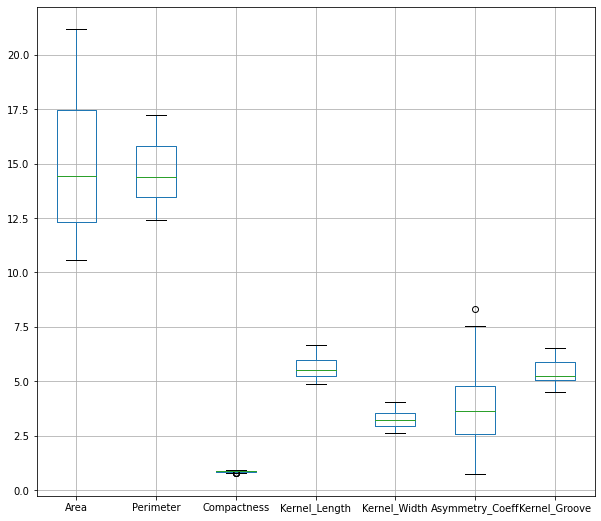

In [104]:
dataset.boxplot(figsize=(10,9))

In [105]:
x = dataset.iloc[:, 0:7]
x.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [106]:
y = dataset['Category']
y.head()

0    Kama
1    Kama
2    Kama
3    Kama
4    Kama
Name: Category, dtype: object

In [107]:
x_train , x_test , y_train , y_test = train_test_split(x, y, random_state=50, test_size = 0.25, stratify = y)

In [108]:
# clf = DecisionTreeClassifier( min_samples_split=50 , criterion = 'entropy' )
dt_default = DecisionTreeClassifier(max_depth=10, class_weight='balanced')
dt_default.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10)

In [109]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(x_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

    Canadian       1.00      1.00      1.00        16
        Kama       0.94      1.00      0.97        17
        Rosa       1.00      0.94      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [110]:
# Printing confusion matrix and accuracy

print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[16  0  0]
 [ 0 17  0]
 [ 0  1 16]]
0.98


In [111]:
# Create a Pickle file  
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(dt_default, pickle_out)
pickle_out.close()

In [112]:
# -*- coding: utf-8 -*-

import numpy as np
import pickle
import pandas as pd
from flask import Flask, request
from flask import Flask, request, jsonify, render_template

app=Flask(__name__)
pickle_in = open("model.pkl","rb")
model=pickle.load(pickle_in)

@app.route('/')
def home():
    return render_template('index.html')



@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [x for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    
    return render_template('index.html', prediction_text='Wheat Kernal is {}'.format(prediction))
    
    


if __name__=='__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Apr/2022 22:04:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Apr/2022 22:04:19] "GET /static/css/style.css HTTP/1.1" 200 -
